<a href="https://colab.research.google.com/github/Ajitabh-12-7/Mini-project-3/blob/main/Mini_Project_3_With_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1><center><font size=12>Introduction to LLMs and GenAI</center></font></h1>
<h1><center><font size=8>Mini Project 3: Attention Mechanism and Transformers</center></h1>

#  **Emergence of Embeddings from BOW to Self Attention:**
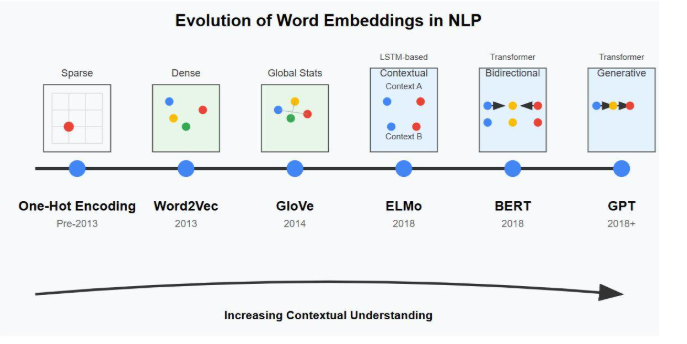

# **Visual Roadmap**
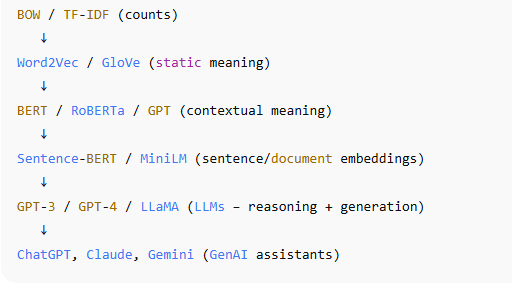

# **Quick Recap**

* Project 1 (BOW/TF-IDF + ML models): Words treated as independent counts, no meaning.

* Project 2 (Word2Vec, GloVe): Words as static vectors → captures similarity, but same word = same vector everywhere.

**Problem still unsolved: Meaning of a word changes with context.**

**==========================================================**



# **Evolution of Embeddings**
1️⃣ Word Embeddings (Word2Vec, GloVe, FastText)

* Each word is mapped to a fixed vector (e.g., 300 dimensions).

* Words with similar context appear close in vector space.

  Example: king – man + woman ≈ queen.

* Limitation:

  * They are static → the word has only one meaning.

    Example: “bank” (riverbank vs. financial bank) gets the same vector.

  * No understanding of sentence-level meaning.

2️⃣ Contextual Word Embeddings (BERT -Bidirectional Encoder Representations from Transformers, RoBERTa, GPT)

* Instead of static vectors, context matters.

 “bank” in “money at the bank” vs. “sat by the river bank” → different embeddings.

* Each token (word/subword) has an embedding that changes depending on surrounding words.

* Limitation:

  * Great for NLP tasks (QA, classification), but not efficient for sentence-to-sentence similarity.

  * To compare two sentences, BERT must process them together → very slow for large datasets.

3️⃣ Sentence Embeddings (SBERT = Sentence-Transformers)

* SBERT builds on BERT, but fine-tunes it with Siamese / Triplet networks.

  Output: a single fixed-length vector for the whole sentence/document.

* Now, we can:

  * Compare sentences with cosine similarity (fast).

  * Cluster thousands of sentences/documents easily.

## **Visual Summary**
| Level                          | Example Tech          | What It Represents               | Limitations                                             |
| ------------------------------ | --------------------- | -------------------------------- | ------------------------------------------------------- |
| **Word Embeddings**            | Word2Vec, GloVe       | Fixed vector for each word       | No context, can’t represent full sentences              |
| **Contextual Word Embeddings** | BERT, RoBERTa         | Context-sensitive word vectors   | Expensive to compare sentences, not sentence-level      |
| **Sentence Embeddings**        | SBERT (MiniLM, MPNet) | One vector per sentence/document | ✅ Fast, ✅ Contextual, ✅ Good for clustering & retrieval |


##  **Which real-world tasks each technique is best at:**

* TF-IDF: Spam detection, keyword extraction

* Word2Vec/GloVe: Synonym finding, word similarity

* BERT: Sentiment analysis, entity recognition, Q&A

* Sentence-BERT/MiniLM: Document classification, semantic search

* GPT/LLMs: Summarization, chatbot, essay writing, code generation

**=========================================================**

# **Transformers as the Foundation**

The Transformer architecture (Vaswani et al., 2017 — **“Attention Is All You Need”**) is the base building block.

It introduced self-attention, which is very powerful for capturing relationships in sequences (words, tokens, etc.).

## **What happened after Transformers**

### Since then, researchers have been:

* Adapting the Transformer for different problems.

* Mixing in older techniques (like Siamese networks, triplet loss, contrastive learning, distillation).

* Fine-tuning them on different datasets (news, dialogues, code, multimodal).

### It looks a lot like “hit & trial,” but it’s actually a structured exploration of design choices:

* Want word embeddings with context? → Use BERT.

* Need faster, smaller models? → DistilBERT, MiniLM.

* Want sentence-level similarity? → SBERT (uses Siamese/Triplet on top of BERT).

* Want long document handling? → Longformer, BigBird.

* Want images + text together? → CLIP.

* Want generation? → GPT family, T5.

### **Why it feels like “Hit & Trial”**

There isn't a single recipe that works for all NLP problems.

Researchers try different training objectives, architectures, and tricks → then benchmark them.

Successful ones become new standards (like BERT, GPT, SBERT, CLIP).

Others fade away if they don’t generalize well.

## **Analogy**

* Think of the Transformer as “the engine”.

* Some people build cars (BERT, GPT for text).

* Others build bikes (DistilBERT: lightweight).

* Some make trucks (Longformer: long documents).

* Others make flying cars (CLIP: vision + text).


***Transformer is the base. Everything else is creative variations + smart training tricks to solve specific tasks.***

**===========================================================**

# **Problem Statement**

## Business Context

In today’s fast-paced media industry, swiftly categorizing and curating content is crucial. With an overwhelming flow of news across diverse topics, efficient systems are needed to deliver the right content to the right audience and maintain engagement.

Key Challenges:

* Information Overload: The vast number of articles makes manual categorization impractical.

* Timeliness: Delays in classification can lead to outdated or misplaced content.

## Problem Definition

E-news Express, a news aggregation startup, struggles with efficiently categorizing diverse articles across sports, entertainment, politics, and more. Manual classification is time-consuming, error-prone, and risks delays or reputational damage. To address this, the startup aims to adopt machine learning to automate categorization.

As a data scientist, the task is to build an unsupervised model that groups articles by content and validate results against human labels, ensuring faster, accurate, and personalized news delivery.

## Data Dictionary

- **Text**: The main body of the news article

## Installing and importing the necessary libraries

In [ ]:
# installing the sentence-transformers library
!pip install -U sentence-transformers -q

In [ ]:
# to read and manipulate the data
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', None)    # setting column to the maximum column width as per the data

# to visualise data
import matplotlib.pyplot as plt
import seaborn as sns

# to compute distances
from scipy.spatial.distance import cdist, pdist
from sklearn.metrics import silhouette_score

# importing the PyTorch Deep Learning library
import torch

# to import the model
from sentence_transformers import SentenceTransformer

# to cluster the data
from sklearn.cluster import KMeans

# to compute metrics
from sklearn.metrics import classification_report

# to avoid displaying unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
reviews = pd.read_csv("/content/news_articles.csv", sep='\t', on_bad_lines='skip', engine='python', header=None)

In [ ]:
# creating a copy of the dataset
data = reviews.copy()
data.columns = ['Text'] # Renaming the column to 'Text'

## Data Overview

### Checking the first five rows of the data

In [ ]:
# Print first 5 rows of data
data.head()

,Text
0,ing in his heels during contract negotiations to insist he must be allowed to play for Wales.
1,Chelsea chief executive Peter Kenyon has played down reports that Arjen Robben will return for the Champions League match against Barcelona.
2,"""""He's been responding well to treatment and started running on Friday, but we'll have to wait and see,"""" he told BBC Five Live's Sportsweek. """"We're looking to getting him back as soon as possible, but he'll be back when it's right for him and for us. """"There's no plans at the moment around the Barcelona game."""" His comments contradict those of chiropractor Jean Pierre Meersseman who treated the Dutchman after he fractured his foot at the start of February. Robben had been expected to be out for six weeks, but Meersseman hinted that the winger could be fit for the vital Stamford Bridge game on 8 March. """"I hope he can be back and I will try to help him make that happen,"""" Meersseman told the Mail on Sunday. """"I put everything right with Arjen's foot the last time I saw him 12 days ago. It was an obvious correction and easy to perform. """"I know he was pleased with what I did and now that he is running again. I am due to see him one more time again in the next few days."""" Meersseman is the medical co-ordinator at Italian side AC Milan."
3,British and Irish Lions coach Clive Woodward says he is unlikely to select any players not involved in next year's RBS Six Nations Championship.
4,"World Cup winners Lawrence Dallaglio, Neil Back and Martin Johnson had all been thought to be in the frame for next summer's tour to New Zealand. """"I don't think you can ever say never,"""" said Woodward. """"But I would have to have a compulsive reason to pick any player who is not available to international rugby."""" Dallaglio, Back and Johnson have all retired from international rugby over the last 12 months but continue to star for their club sides. But Woodward added: """"The key thing that I want to stress is that I intend to use the Six Nations and the players who are available to international rugby as the key benchmark. """"My job, along with all the other senior representatives, is to make sure that we pick the strongest possible team. """"If you are not playing international rugby then it's still a step up to Test rugby. It's definitely a disadvantage."


In [ ]:
# checking a news article
data.loc[3, 'Text']

" British and Irish Lions coach Clive Woodward says he is unlikely to select any players not involved in next year's RBS Six Nations Championship."

### Checking the last five rows of the data

In [ ]:
# Print last 5 rows of data
data.tail()

,Text
6099,"It also reported on Friday that passenger numbers rose 8.1% in January. Aviation analyst Nick Van den Brul of BNP Paribas described BA's latest quarterly results as """"pretty modest"""". """"It is quite good on the revenue side and it shows the impact of fuel surcharges and a positive cargo development, however, operating margins down and cost impact of fuel are very strong,"""" he said. Since the 11 September 2001 attacks in the United States, BA has cut 13,000 jobs as part of a major cost-cutting drive. """"Our focus remains on reducing controllable costs and debt whilst continuing to invest in our products,"""" Mr Eddington said. """"For example, we have taken delivery of six Airbus A321 aircraft and next month we will start further improvements to our Club World flat beds."""" BA's shares closed up four pence at 274.5 pence."
6100,"The gap between US exports and imports hit an all-time high of $671.7bn (Â£484bn) in 2004, latest figures show."
6101,"The Commerce Department said the trade deficit for all of last year was 24.4% above the previous record - 2003's imbalance of $496.5bn. The deficit with China, up 30.5% at $162bn, was the largest ever recorded with a single country. However, on a monthly basis the US trade gap narrowed by 4.9% in December to Â£56.4bn. The US consumer's appetite for all things from oil to imported cars, and even wine and cheese, reached record levels last year and the figures are likely to spark fresh criticism of President Bush's economic policies."
6102,"Democrats claim the administration has not done enough to clamp down on unfair foreign trade practices. For example, they believe China's currency policy - which US manufacturers claim has undervalued the yuan by as much as 40% - has given China's rapidly expanding economy an unfair advantage against US competitors."
6103,"Meanwhile, the Bush administration argues that the US deficit reflects the fact the America is growing at faster rate than the rest of the world, spurring on more demand for imported goods. Some economists say this may allow an upward revision of US economic growth in the fourth quarter. But others point out that the deficit has reached such astronomical proportions that foreigners many choose not to hold as many dollar-denominated assets, which may in turn harm growth. For all of 2004, US exports rose 12.3% to $1.15 trillion, but imports rose even faster by 16.3% to a new record of $1.76 trillion. Foreign oil exports surged by 35.7% to a record $180.7bn, reflecting the rally in global oil prices and increasing domestic demand. Imports were not affected by the dollar's weakness last year. """"We expect the deficit to continue to widen in 2005 even if the dollar gets back to its downward trend,"""" said economist Marie-Pierre Ripert at IXIS."


### Checking the shape of the dataset

In [ ]:
# print shape of data
data.shape

(6104, 1)

* The data comprises of ~2.2k news articles

### Checking for missing values

In [ ]:
# Check for missing values
data.isnull().sum()

,0
Text,0


- There are no mising values in the data

### Checking for duplicate values

In [ ]:
# Check for duplicate values
data.duplicated().sum()

np.int64(505)

- We'll drop the duplicate values in the data.

In [ ]:
data = data.drop_duplicates()

# resetting the dataframe index
data.reset_index(drop=True, inplace=True)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.shape

(5599, 1)

- There are no duplicate values in the data now.

## Model Building

### What is required?
* We don't want to compare words → we want to categorize full news articles.
* SBERT gives us compact, meaningful vectors for each article.

* Then we can use clustering / classification to group them into Politics, Business, Entertainment, Technology, Sports.

### What are Sentence-Transformers (SBERT)?

* Sentence-Transformers (SBERT) is an open-source Python framework (built on PyTorch & Hugging Face Transformers) that provides models to generate dense vector representations (embeddings) for sentences, paragraphs, or documents.

* These embeddings capture semantic meaning — so sentences with similar meaning are close together in vector space.

### **Defining the model**

#### We'll be using the **all-MiniLM-L6-v2** model here.
This model is from Sentence-Transformers (by Hugging Face + Microsoft)

* The all-MiniLM-L6-v2 model is an all-round (all) model trained on a large and diverse dataset of over 1 billion training samples and generates state-of-the-art sentence embeddings of 384 dimensions.

* It is a language model (LM) that has 6 transformer encoder layers (L6) and is a smaller model (Mini) trained to mimic the performance of a larger model (BERT).

* Potential use-cases include text classification, sentiment analysis, and semantic search.


**Key reasons it fits our use case well:**

* Compact & Lightweight
Only 22M parameters, embedding size 384.

* Super fast to train/infer, even on CPU or a free Colab GPU.
Ideal for a dataset of ~2K articles — no overkill.

* High-Quality Semantic Embeddings
Trained on 1 billion+ sentence pairs.

* Optimized for semantic similarity & clustering, which is exactly what we need for news categorization (unsupervised or semi-supervised).

* Balanced Accuracy vs. Speed
Benchmarks show 80-85% performance of much larger models (like MPNet or RoBERTa-large) at a fraction of the compute cost.

* Perfect when our dataset isn't huge but still needs good accuracy.

* Freely Downloadable & Offline Usable
Unlike API-only models (e.g., OpenAI's text-embedding-ada-002), we can fully download and run it in Colab without internet after setup.

* Zero cost + no data privacy concerns.

### Other comparable models;

| Model                                 | Dimensionality | Size          | Speed (Colab)                | Accuracy (Semantic Tasks)                      | Cost / Availability               | Best Use Case                                   |
| ------------------------------------- | -------------- | ------------- | ---------------------------- | ---------------------------------------------- | --------------------------------- | ----------------------------------------------- |
| **all-MiniLM-L6-v2** (SBERT)          | 384            | \~22M params  | 🚀 Very Fast (CPU/GPU)       | ⭐⭐☆ (Good, \~80% of SOTA)                      | Free, Downloadable (Hugging Face) | Small datasets, clustering, categorization      |
| **all-mpnet-base-v2** (SBERT)         | 768            | \~109M params | ⚡ Medium (needs GPU)         | ⭐⭐⭐ (High, \~90% of SOTA)                      | Free, Downloadable (Hugging Face) | When accuracy matters more than speed           |
| **all-distilroberta-v1** (SBERT)      | 768            | \~82M params  | ⚡ Medium                     | ⭐⭐☆ (Good, better than MiniLM but below MPNet) | Free, Downloadable                | Balanced speed & performance                    |
| **multi-qa-MiniLM-L6-cos-v1** (SBERT) | 384            | \~22M params  | 🚀 Very Fast                 | ⭐⭐☆ (Good, optimized for QA/Retrieval)         | Free, Downloadable                | Search, RAG-style tasks                         |
| **OpenAI text-embedding-3-small**     | 1536           | API-only      | ⚡ Fast (API latency \~300ms) | ⭐⭐⭐⭐ (SOTA on benchmarks)                      | Low cost (\$0.02 / 1M tokens)     | Industry-grade semantic search & classification |
| **Cohere embed-multilingual-v3**      | 1024           | API-only      | ⚡ Fast (API latency)         | ⭐⭐⭐⭐ (Strong multilingual)                     | Free tier (5M tokens/mo)          | Multilingual datasets, cross-lingual tasks      |
| **Google Gecko (Vertex AI)**          | 768–1024       | API-only      | ⚡ Fast                       | ⭐⭐⭐⭐ (Google quality, multilingual)            | Paid (GCP pricing)                | Enterprise / multilingual RAG                   |


**=====================================**

* hf_xet is a helper package for enhancing file transfers with the Hugging Face Hub.
It integrates Rust-based code for efficient, chunk-based deduplication,
and caching when uploading or downloading large files

In [ ]:
!pip install hf_xet

In [ ]:
#Defining the model
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

### **Encoding the dataset**

In [ ]:
# setting the device to GPU if available, else CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# encoding the dataset
embedding_matrix = model.encode(data['Text'], show_progress_bar=True, device=device)

Batches:   0%|          | 0/175 [00:00<?, ?it/s]

In [ ]:
# printing the shape of the embedding matrix
embedding_matrix.shape

(5599, 384)

**Embedding dimensions for different models**
| **Model**                              | **Embedding Dimension** |
| -------------------------------------- | ----------------------- |
| `all-MiniLM-L6-v2`                     | 384                     |
| `all-mpnet-base-v2`                    | 768                     |
| `paraphrase-MiniLM-L12-v2`             | 384                     |
| `distilbert-base-nli-stsb-mean-tokens` | 768                     |


- Each news article has been converted to a 384-dimensional vector

In [ ]:
# printing the embedding vector of the first review in the dataset
embedding_matrix

array([[-0.02574065,  0.07848034, -0.00548803, ..., -0.05141718,
         0.02893377,  0.03701566],
       [-0.01906879, -0.00368412,  0.01734062, ..., -0.0480833 ,
        -0.12546161,  0.02387686],
       [-0.06667556,  0.02389466,  0.06003102, ..., -0.06179456,
        -0.07750966,  0.02612172],
       ...,
       [ 0.01749663, -0.09081081,  0.00549291, ..., -0.06682559,
        -0.00422151,  0.04206276],
       [-0.01116494, -0.02403586,  0.01916853, ..., -0.0369583 ,
         0.0747536 ,  0.02433349],
       [-0.03219907, -0.1249662 ,  0.01968913, ..., -0.0349706 ,
         0.05644905,  0.0535389 ]], dtype=float32)

**Note**: We have not trained or fine-tuned the model. We have used the pre-trained model to encode the dataset.

### **Semantic Search**

In [ ]:
# defining a function to compute the cosine similarity between two embedding vectors
def cosine_score(text1,text2):
    # encoding the text
    embeddings1 = model.encode(text1)
    embeddings2 = model.encode(text2)

    # calculating the L2 norm of the embedding vector
    norm1 = np.linalg.norm(embeddings1)
    norm2 = np.linalg.norm(embeddings2)

    # computing the cosine similarity
    cosine_similarity_score = ((np.dot(embeddings1,embeddings2))/(norm1*norm2))

    return cosine_similarity_score

In [ ]:
a= "i love apple"
b= "apple is a fruit"
c= "i like this table"
print(cosine_score(a,b))
print(cosine_score(b,c))
print(cosine_score(a,c))


0.55750245
0.07198224
0.27396196


In [ ]:
# We can also use prebuilt method to calculate similarity score

a= "i love apple"
b= "apple is a fruit"
c= "i like this table"

from sentence_transformers import util

embeddings1 = model.encode(a)
embeddings2 = model.encode(b)
embeddings3 = model.encode(c)

print(util.cos_sim(embeddings1, embeddings2))
print(util.cos_sim(embeddings2, embeddings3))
print(util.cos_sim(embeddings1, embeddings3))

tensor([[0.5575]])
tensor([[0.0720]])
tensor([[0.2740]])


**Now, let's search for similar reviews in our dataset.**

In [ ]:
# defining a function to find the top k similar sentences for a given query
def top_k_similar_sentences(embedding_matrix, query_text, k):
    # encoding the query text
    query_embedding = model.encode(query_text)

    # calculating the cosine similarity between the query vector and all other encoded vectors of our dataset
    score_vector = np.dot(embedding_matrix,query_embedding)

    # sorting the scores in descending order and choosing the first k
    top_k_indices = np.argsort(score_vector)[::-1][:k]

    # returning the corresponding reviews
    return data.loc[list(top_k_indices), 'Text']

In [ ]:
# defining the query text
query_text = "Budget for elections"

# displaying the top 2 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 2)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")

 The budget deficit hit a record $412bn in the 12 months to 30 September 2004, after reaching $377bn in the previous fiscal year. The CBO also forecast a total shortfall of $855bn for the years from 2006 to 2015, an improvement on previous projections. However, analysts say the new figures fail to take into account the potential $2-$3.8 trillion costs of the president's plan to revamp state pensions and extend tax cuts. The figure could also be worsened by any further military costs. Republicans have blamed the size of the deficit on slow economic conditions after the 11 September attacks and ongoing military operations in Iraq and Afghanistan. One of President George W Bush's election pledges was to halve the budget deficit within five years. But Democrats have accused the president of excluding Iraq-related costs from previous budgets to meet the aim of reducing the deficit, a charge which the administration denies. On Tuesday, the US administration asked Congress for additional fund

In [ ]:
# defining the query text
query_text = "High imports and exports"

# displaying the top 2 similar sentences
top_k_reviews = top_k_similar_sentences(embedding_matrix, query_text, 2)

for i in top_k_reviews:
    print(i, end="\n")
    print("*******************************************************************")
    print("\n")

 The gap between US exports and imports hit an all-time high of $671.7bn (Â£484bn) in 2004, latest figures show.
*******************************************************************


 Figures from the Commerce Department for November showed exports down 2.3% to $95.6bn, while imports grew 1.3% to $155.8bn on rising consumer demand. Part of the expanding deficit came from high prices for oil imports. But the numbers suggested the sliding dollar - which makes exports less expensive - has had little impact, and could indicate slowing economic growth.
*******************************************************************




### **Categorization**

**We'll use K-Means Clustering to categorize the data.**

In [ ]:
meanDistortions = []
clusters = range(2, 11)

for k in clusters:
    clusterer = KMeans(n_clusters=k, random_state=1)
    clusterer.fit(embedding_matrix)

    prediction = clusterer.predict(embedding_matrix)

    distortion = sum(
        np.min(cdist(embedding_matrix, clusterer.cluster_centers_, "euclidean"), axis=1) ** 2
    )
    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

Number of Clusters: 2 	Average Distortion: 4938.238204833121
Number of Clusters: 3 	Average Distortion: 4763.433913028231
Number of Clusters: 4 	Average Distortion: 4687.538944350057
Number of Clusters: 5 	Average Distortion: 4638.2680338750215
Number of Clusters: 6 	Average Distortion: 4564.796662980387
Number of Clusters: 7 	Average Distortion: 4524.995975891996
Number of Clusters: 8 	Average Distortion: 4481.994987878765
Number of Clusters: 9 	Average Distortion: 4447.6102629422885
Number of Clusters: 10 	Average Distortion: 4425.423398843738


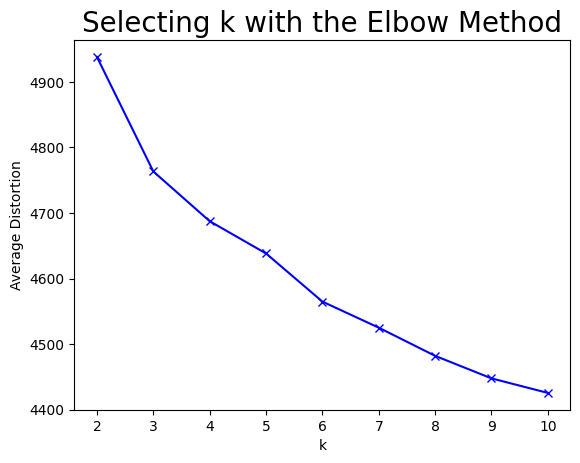

In [ ]:
plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

- The appropriate value of k from the Elbow curve seems to 5.

**Let's check the silhouette scores.**

In [ ]:
sil_score = []
cluster_list = range(2, 11)

for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)

    preds = clusterer.fit_predict((embedding_matrix))

    score = silhouette_score(embedding_matrix, preds)
    sil_score.append(score)

    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.04586304724216461)
For n_clusters = 3, the silhouette score is 0.047289732843637466)
For n_clusters = 4, the silhouette score is 0.04094228893518448)
For n_clusters = 5, the silhouette score is 0.040931250900030136)
For n_clusters = 6, the silhouette score is 0.03791067376732826)
For n_clusters = 7, the silhouette score is 0.03741827607154846)
For n_clusters = 8, the silhouette score is 0.03809383511543274)
For n_clusters = 9, the silhouette score is 0.03668433427810669)
For n_clusters = 10, the silhouette score is 0.03356900438666344)


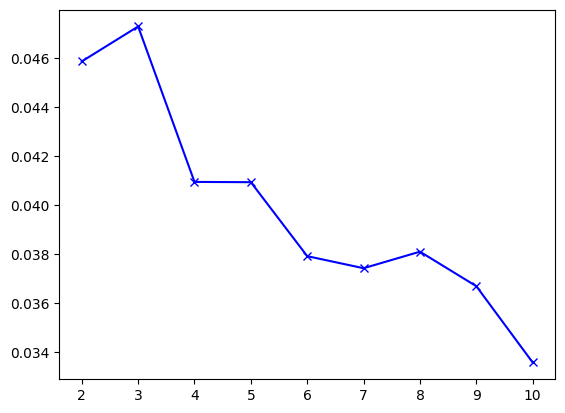

In [ ]:
plt.plot(cluster_list, sil_score, "bx-")
plt.show()

- The silhouette coefficient for 5 clusters is the highest.
- So, we will proceed with 5 clusters.

In [ ]:
# defining the number of clusters/categories
n_categories = 5

# fitting the model
kmeans = KMeans(n_clusters=n_categories, random_state=1).fit(embedding_matrix)

In [ ]:
# checking the cluster centers
centers = kmeans.cluster_centers_
centers

array([[-0.01364922, -0.02531588, -0.01564598, ..., -0.03827451,
         0.00251569,  0.01739971],
       [-0.00686058, -0.02562517,  0.01224629, ..., -0.02885437,
        -0.00207688,  0.03668414],
       [-0.03569356, -0.00474832,  0.00383208, ..., -0.04641017,
         0.02595017,  0.01182021],
       [ 0.01095968, -0.02647619, -0.00011519, ..., -0.05517583,
         0.00889115, -0.00916419],
       [-0.00093282, -0.02307836,  0.00759951, ..., -0.08577587,
        -0.00313366,  0.0278728 ]], dtype=float32)

In [ ]:
kmeans.labels_

array([3, 4, 4, ..., 4, 4, 4], dtype=int32)

In [ ]:
# creating a copy of the data
clustered_data = data.copy()

# assigning the cluster/category labels
clustered_data['Category'] = kmeans.labels_

clustered_data.head()

,Text,Category
0,ing in his heels during contract negotiations to insist he must be allowed to play for Wales.,3
1,Chelsea chief executive Peter Kenyon has played down reports that Arjen Robben will return for the Champions League match against Barcelona.,4
2,"""""He's been responding well to treatment and started running on Friday, but we'll have to wait and see,"""" he told BBC Five Live's Sportsweek. """"We're looking to getting him back as soon as possible, but he'll be back when it's right for him and for us. """"There's no plans at the moment around the Barcelona game."""" His comments contradict those of chiropractor Jean Pierre Meersseman who treated the Dutchman after he fractured his foot at the start of February. Robben had been expected to be out for six weeks, but Meersseman hinted that the winger could be fit for the vital Stamford Bridge game on 8 March. """"I hope he can be back and I will try to help him make that happen,"""" Meersseman told the Mail on Sunday. """"I put everything right with Arjen's foot the last time I saw him 12 days ago. It was an obvious correction and easy to perform. """"I know he was pleased with what I did and now that he is running again. I am due to see him one more time again in the next few days."""" Meersseman is the medical co-ordinator at Italian side AC Milan.",4
3,British and Irish Lions coach Clive Woodward says he is unlikely to select any players not involved in next year's RBS Six Nations Championship.,0
4,"World Cup winners Lawrence Dallaglio, Neil Back and Martin Johnson had all been thought to be in the frame for next summer's tour to New Zealand. """"I don't think you can ever say never,"""" said Woodward. """"But I would have to have a compulsive reason to pick any player who is not available to international rugby."""" Dallaglio, Back and Johnson have all retired from international rugby over the last 12 months but continue to star for their club sides. But Woodward added: """"The key thing that I want to stress is that I intend to use the Six Nations and the players who are available to international rugby as the key benchmark. """"My job, along with all the other senior representatives, is to make sure that we pick the strongest possible team. """"If you are not playing international rugby then it's still a step up to Test rugby. It's definitely a disadvantage.",0


In [ ]:
clustered_data.sample(5)

,Text,Category
2374,"This year marks Conti's 17th turn at the helm of the Academy Awards orchestra. """"The excitement is a live performance as a musician,"""" he says. """"All of your colleagues, everyone in the film industry is in the theatre. All the important people. """"I guess it's just a television show but we always think it's a bit more.' The orchestra strikes up more than 110 times during the average Oscars show. As well as playing the presenters and winners on and off stage, it also performs during the commercial breaks to entertain the live audience in the house.",0
5598,"Meanwhile, the Bush administration argues that the US deficit reflects the fact the America is growing at faster rate than the rest of the world, spurring on more demand for imported goods. Some economists say this may allow an upward revision of US economic growth in the fourth quarter. But others point out that the deficit has reached such astronomical proportions that foreigners many choose not to hold as many dollar-denominated assets, which may in turn harm growth. For all of 2004, US exports rose 12.3% to $1.15 trillion, but imports rose even faster by 16.3% to a new record of $1.76 trillion. Foreign oil exports surged by 35.7% to a record $180.7bn, reflecting the rally in global oil prices and increasing domestic demand. Imports were not affected by the dollar's weakness last year. """"We expect the deficit to continue to widen in 2005 even if the dollar gets back to its downward trend,"""" said economist Marie-Pierre Ripert at IXIS.",4
2215,"Ray's success on DVD outstripped its $74m (Â£40m) US box office total, earning more than $40m (Â£22m) on the first day of the DVD's release alone. Ray has been nominated in six Oscar categories including best film and best actor for Jamie Foxx. The film recounts the life of blues singer Ray Charles, who died in 2004. In its first week on home entertainment release the film was the number one selling DVD, with the limited edition version coming in at number 11. Sony horror film The Grudge, starring Michelle Gellar, was the US' second best-selling DVD, with Jennifer Lopez and Richard Gere's romantic comedy Shall We Dance? at number three. Foxx's critically acclaimed performance as Ray has already earned him a Screen Actors Guild Award for best actor, as well as a prestigious Golden Globe. Ray director Taylor Hackford, responsible for the classic 1982 film An Officer and a Gentleman, has also received an Oscar nomination in the best director category. The film's three other Oscar nominations are for costume, film editing and sound mixing.",0
2850,"The event will see screen executives decamp from Hollywood to Park City, Utah, for 11 days to search for low-key movies that could make it big in 2005. Open Water, Napoleon Dynamite, Garden State and Super-Size Me were all snapped up at last year's festival. But stars like Keanu Reeves and Pierce Brosnan also have films showing there. The festival is being opened by a screening of quirky comedy Happy Endings, starring former Friends actress Lisa Kudrow and Maggie Gyllenhaal, on Thursday.",0
4274,"According to a statement from Mr Spitzer's office, the Marsh executive admitted he instructed insurance companies to submit non-competitive bids for insurance business between 2002 and 2004. Those bids were then """"conveyed to Marsh clients under false and fraudulent pretences"""". Through the practice, Marsh was allowed to determine which insurers won business from clients, and so control the insurance market, Mr Spitzer's office added. It also protected incumbent insurers when their business was up for renewal and helped Marsh to maximise its fees, a statement said. In one case, an email showed Mr Stearns had instructed a colleague to solicit a non-competitive - or """"B"""" - quote from AIG that was """"higher in premium and more restrictive in coverage"""" and so fixed the bids in a way that would support the present provider Chubb. The company is also still being 

Let's check a few random news articles from each of the categories.

In [ ]:
# for each cluster, printing the 5 random news articles
for i in range(5):
    print("CLUSTER",i)
    print(clustered_data.loc[clustered_data.Category == i, 'Text'].sample(5, random_state=1).values)
    print("*****************************************************************")
    print("\n")

CLUSTER 0
[' The creator of Buffy the Vampire Slayer is to take on a new female superhero after signing up to write and direct the Wonder Woman movie.'
 ' The Aviator took four awards in all, also collecting best make-up and hair and production design, while Vera Drake also scooped best costume design. Staunton, who is up for an Oscar for her role in Vera Drake, arrived wearing a green silk and chiffon beaded evening dress. ""Thank you very much. I\'m so thrilled and so grateful and I\'m delighted that the success of Vera Drake has boosted sales of hair nets and pinnies, which is very good,"" she said on accepting her award. Her director Leigh, who beat Martin Scorsese to the best director award, told the audience: ""We always say it was a surprise and sometimes I\'ve said it and not meant it. On this occasion, given the other names, it\'s a real surprise and an extraordinary honour. ""It\'s an immense privilege to have been allowed the freedom to make as uncompromising a film as I thi

Based on the above news articles, we can see that they can be categorized as follows:

- 0: Sports
- 1: Politics
- 2: Entertainment
- 3: Business
- 4: Technology

In [ ]:
# dictionary of cluster label to category
category_dict = {
    0: 'Sports',
    1: 'Politics',
    2: 'Entertainment',
    3: 'Business',
    4: 'Technology'
}
# mapping cluster labels to categories
clustered_data['Category'] = clustered_data['Category'].map(category_dict)

clustered_data.head()

,Text,Category
0,ing in his heels during contract negotiations to insist he must be allowed to play for Wales.,Business
1,Chelsea chief executive Peter Kenyon has played down reports that Arjen Robben will return for the Champions League match against Barcelona.,Technology
2,"""""He's been responding well to treatment and started running on Friday, but we'll have to wait and see,"""" he told BBC Five Live's Sportsweek. """"We're looking to getting him back as soon as possible, but he'll be back when it's right for him and for us. """"There's no plans at the moment around the Barcelona game."""" His comments contradict those of chiropractor Jean Pierre Meersseman who treated the Dutchman after he fractured his foot at the start of February. Robben had been expected to be out for six weeks, but Meersseman hinted that the winger could be fit for the vital Stamford Bridge game on 8 March. """"I hope he can be back and I will try to help him make that happen,"""" Meersseman told the Mail on Sunday. """"I put everything right with Arjen's foot the last time I saw him 12 days ago. It was an obvious correction and easy to perform. """"I know he was pleased with what I did and now that he is running again. I am due to see him one more time again in the next few days."""" Meersseman is the medical co-ordinator at Italian side AC Milan.",Technology
3,British and Irish Lions coach Clive Woodward says he is unlikely to select any players not involved in next year's RBS Six Nations Championship.,Sports
4,"World Cup winners Lawrence Dallaglio, Neil Back and Martin Johnson had all been thought to be in the frame for next summer's tour to New Zealand. """"I don't think you can ever say never,"""" said Woodward. """"But I would have to have a compulsive reason to pick any player who is not available to international rugby."""" Dallaglio, Back and Johnson have all retired from international rugby over the last 12 months but continue to star for their club sides. But Woodward added: """"The key thing that I want to stress is that I intend to use the Six Nations and the players who are available to international rugby as the key benchmark. """"My job, along with all the other senior representatives, is to make sure that we pick the strongest possible team. """"If you are not playing international rugby then it's still a step up to Test rugby. It's definitely a disadvantage.",Sports


### **Comparing with Actual Categories**

In [ ]:
# loading the actual labels
labels = pd.read_csv("/content/news_article_labels.csv")

In [ ]:
labels.shape

(2127, 1)

In [ ]:
# checking the unique labels
labels['Label'].unique()

array(['Politics', 'Sports', 'Technology', 'Entertainment', 'Business'],
      dtype=object)

In [ ]:
labels['Label'].value_counts(normalize=True)

,proportion
Label,
Sports,0.237424
Business,0.236483
Politics,0.189469
Entertainment,0.173484
Technology,0.163141


In [ ]:
# adding the actual categories to our dataframe
clustered_data['Actual Category'] = labels['Label'].values[:len(clustered_data)]

ValueError: Length of values (2127) does not match length of index (5599)

In [ ]:
print(classification_report(clustered_data['Actual Category'], clustered_data['Category']))

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
cm= confusion_matrix(clustered_data['Actual Category'], clustered_data['Category'],labels= clustered_data['Actual Category'].unique() )
cm


In [ ]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clustered_data['Actual Category'].unique())
disp.plot();


In [ ]:
import matplotlib.pyplot as plt
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=clustered_data['Actual Category'].unique()
)
ax = disp.plot(cmap="Blues").ax_

# Rotate xtick labels by 45°
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()


We were able to categorize the news articles with 96% accuracy

- Note that we were able to do so WITHOUT knowing the actual labels for the news articles.

### **Analyzing Incorrect Predictions**

Let's check a few cases where our model incorrectly categorized the news articles.

In [ ]:
# creating a dataframe of incorrect categorizations
incorrect_category_data = clustered_data[clustered_data['Actual Category'] != clustered_data['Category']].copy()
incorrect_category_data.shape

In [ ]:
incorrect_category_data.head()

In [ ]:
embedding_matrix[24].reshape(1,-1)

In [ ]:
kmeans.cluster_centers_[[2]]

In [ ]:
idx = 24

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[3]], "euclidean")[0,0])

We see that the distance of the particular news article from the cluster centers of the actual and predicted categories is almost similar.

In [ ]:
idx = 45

print('Distance from Actual Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[2]], "euclidean")[0,0])

print('Distance from Predicted Category')
print(cdist(embedding_matrix[idx].reshape(1,-1), kmeans.cluster_centers_[[4]], "euclidean")[0,0])

We see that the distance of the particular news article from the cluster centers of the actual and predicted categories is almost similar.

Based on this, we can say that a better approach of categorizing these news articles would be to assign more than one category to these news article.

### **Conclusion**

We did the following in the case study:

1. Encoded the dataset using the ***all-MiniLM-L6-v2*** transformer model to generate embeddings of 384 dimensions

2. Queried the dataset to find news articles similar to the query text we passed

3. Categorized the news articles using K-Means Clustering on the transformer encodings

4. Compared the predicted categories of the news articles to the actual categories

5. Analyzed the incorrect predictions to understand where the model went wrong

- Our model can correctly categorize 96% of the news articles.

- As mentioned, one can try tagging news articles with more than one category for better categorization.

    - One can find the cluster centers to which the news article is the closest and assign one or more categories accordingly

- Another approach that can be tried out would be fine-tuning the model to this particular data with category labels (one or more than one) to try and improve the overall performance.

- In addition, the startup can use other transformer models to generate summaries of the news articles, which can provide a gist of the news content.

<font size=5 color='blue'>Thanks!</font>
___

In [ ]:
# Create a temporary DataFrame with original data and labels
temp_df = reviews.copy()
temp_df.columns = ['Text']
temp_df['Label'] = labels['Label']

# Drop duplicates based on the 'Text' column to align with 'data'
temp_df = temp_df.drop_duplicates(subset=['Text'])

# Align the labels with the clustered_data DataFrame
aligned_labels = temp_df['Label'].reset_index(drop=True)

# Now add the aligned labels to clustered_data
clustered_data['Actual Category'] = aligned_labels

# Task
Explain how to push the current notebook to GitHub.

## Set up github integration

### Subtask:
Explain how to enable GitHub integration in Colab.


## Authenticate with github

### Subtask:
Provide instructions on how to authenticate Colab with a GitHub account.


## Save a copy on github

### Subtask:
Generate code to save a copy of the notebook to a GitHub repository.


## Commit and push changes

### Subtask:
Explain how to commit and push any further changes to the notebook on GitHub.


**Reasoning**:
Explain how to commit and push further changes to the notebook on GitHub using the Colab interface.



In [ ]:
# 1. Explain that after the initial save, subsequent changes are committed and pushed directly from the Colab interface.
print("After you have initially saved your notebook to GitHub using 'Save a copy to GitHub', any further changes you make can be committed and pushed directly from the Colab interface as well.")

# 2. Describe the process of making changes to the notebook.
print("\nTo make changes, simply edit the code or markdown cells in your notebook as you normally would.")

# 3. Detail how to save these changes to GitHub by going to the "File" menu and selecting "Save and commit".
print("\nOnce you are ready to save these changes to your GitHub repository, go to the 'File' menu at the top left of the Colab window.")
print("From the dropdown menu, select the 'Save and commit' option.")

# 4. Mention that a commit message can be added to describe the changes being saved.
print("\nA dialog box will appear, allowing you to add a commit message. It's good practice to write a brief, descriptive message summarizing the changes you've made.")
print("After adding your message, click the 'OK' or 'Commit' button to save and push your changes to the linked GitHub repository.")

After you have initially saved your notebook to GitHub using 'Save a copy to GitHub', any further changes you make can be committed and pushed directly from the Colab interface as well.

To make changes, simply edit the code or markdown cells in your notebook as you normally would.

Once you are ready to save these changes to your GitHub repository, go to the 'File' menu at the top left of the Colab window.
From the dropdown menu, select the 'Save and commit' option.

A dialog box will appear, allowing you to add a commit message. It's good practice to write a brief, descriptive message summarizing the changes you've made.
After adding your message, click the 'OK' or 'Commit' button to save and push your changes to the linked GitHub repository.


## Summary:

### Data Analysis Key Findings

*   Enabling GitHub integration in Colab is done through the "File" menu, which links the Colab environment to a GitHub account via authorization prompts.
*   Authenticating Colab with a GitHub account is part of the initial save process via the "File" -> "Save a copy to GitHub" menu option.
*   Saving a Colab notebook to a GitHub repository is primarily a user interface action through "File" -> "Save a copy to GitHub," not a direct code command within a notebook cell.
*   After the initial save, subsequent changes to the notebook can be committed and pushed directly from the Colab interface using the "File" -> "Save and commit" option, where a commit message can be added.

### Insights or Next Steps

*   The process of managing Colab notebooks on GitHub (initial save, commit, and push) is integrated into the Colab UI, simplifying version control for users.
*   For advanced workflows or scripting, exploring the GitHub API or Git command-line tools might be necessary, although the core Colab-to-GitHub integration is UI-driven.
